In [1]:
#Imports
import re
import unicodedata
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

from wordcloud import WordCloud

from env import get_connection

In [2]:
def acquire_spam_data():
    url = get_connection('spam_db')
    query = '''
            SELECT * 
            FROM spam
            '''
    df = pd.read_sql(query, url, index_col='id')
    return df


In [3]:
df = acquire_spam_data()

In [4]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Value counts of labels
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
def clean_text(text, extra_stopwords=['r', 'u', '2', 'ltgt']):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
#Clean the text data by label
ham_words = clean_text(' '.join(df[df['label'] == 'ham']['text']))
spam_words = clean_text(' '.join(df[df['label'] == 'spam']['text']))
all_words = clean_text(' '.join(df['text']))

In [8]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2))

In [9]:
ham_bigrams.head()

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object

In [10]:
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2))

In [11]:
top_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      )

top_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

In [12]:
top_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      )

top_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

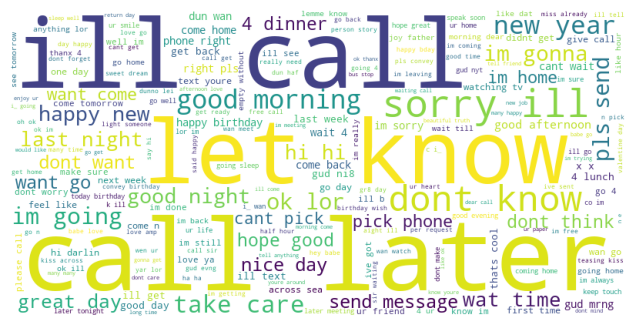

In [13]:
data = {k[0] + ' ' + k[1]: v for k, v in top_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


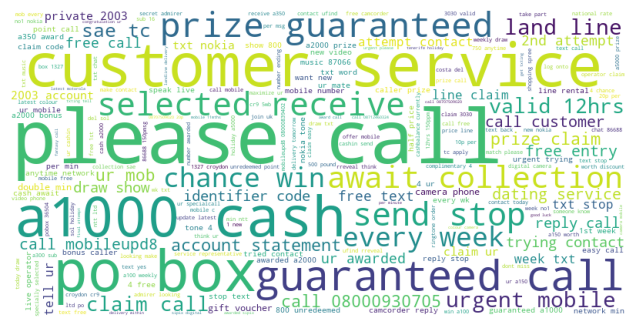

In [14]:
data = {k[0] + ' ' + k[1]: v for k, v in top_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3))
ham_trigrams.head()

0          (go, jurong, point)
1       (jurong, point, crazy)
2    (point, crazy, available)
3    (crazy, available, bugis)
4        (available, bugis, n)
dtype: object

In [16]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3))
spam_trigrams.head()

0    (free, entry, wkly)
1    (entry, wkly, comp)
2      (wkly, comp, win)
3        (comp, win, fa)
4         (win, fa, cup)
dtype: object

In [17]:
top_20_ham_trigrams = ham_trigrams.value_counts().head(20)
top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

In [18]:
top_20_spam_trigrams = spam_trigrams.value_counts().head(20)
top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

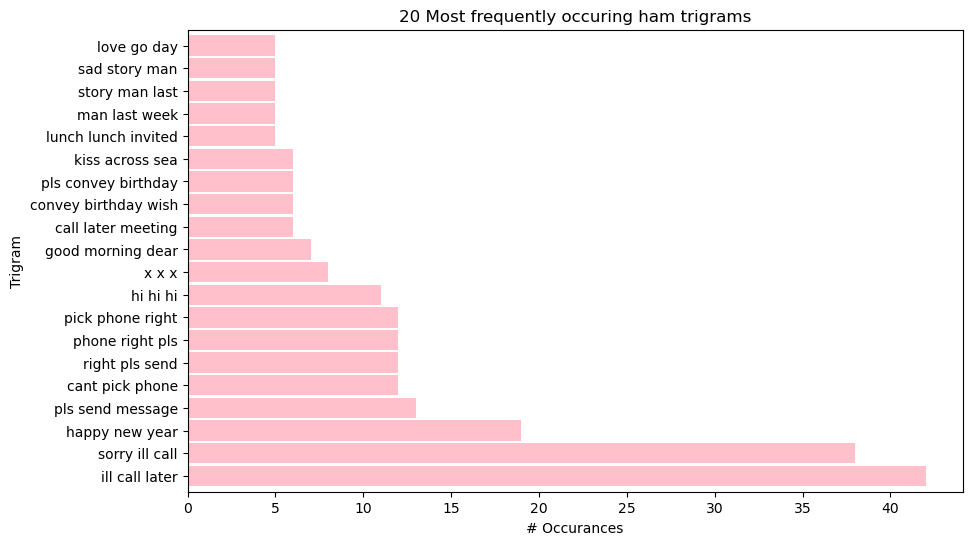

In [19]:
top_20_ham_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2] )
_ = plt.yticks(ticks, labels)

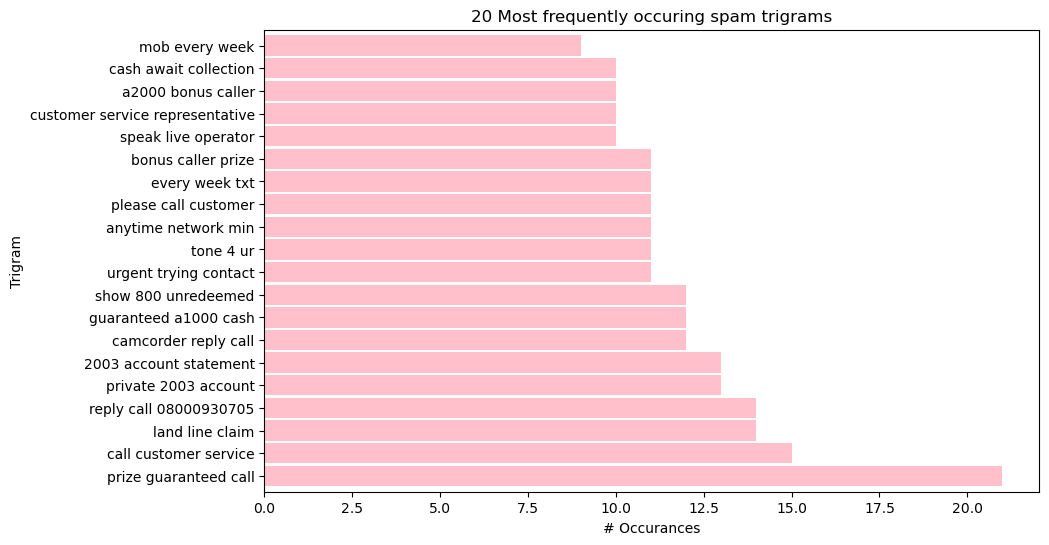

In [20]:
top_20_spam_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2] )
_ = plt.yticks(ticks, labels)

#### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [21]:
codeup_df = pd.DataFrame(acquire.get_blog_articles())

In [22]:
codeup_df

,title,content
0,Black Excellence in Tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...
1,Black excellence in tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...
2,Black excellence in tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...
3,Black excellence in tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...
4,Coding Bootcamp or Self-Learning? Which is Bes...,\nIf you’re interested in embarking on a caree...
5,Codeup Among Top 58 Best Coding Bootcamps of 2023,\nCodeup is pleased to announce we have been r...


In [23]:
news_df = pd.DataFrame(acquire.get_news_articles(['business', 'sports', 'technology', 'entertainment']))

In [24]:
news_df.head()

,category,title,content
0,business,All Adani stocks end higher for the first time...,All 10 Adani Group stocks closed higher on Wed...
1,business,"Bill Gates meets Ratan Tata, N Chandrasekaran;...",Microsoft Co-founder Bill Gates met with Tata ...
2,business,SoftBank sells shares worth ₹954 crore in logi...,SoftBank sold shares worth ₹954 crore in logis...
3,business,Smriti Irani's 2011 tweet on LPG price hike re...,Hours after the central government raised the ...
4,business,"Indian-Americans Renjen, Subramaniam to be mem...",Indian-Americans Punit Renjen and Rajesh Subra...


In [25]:
codeup_df = prepare.prepare_article(codeup_df)

In [27]:
news_df = prepare.prepare_article(news_df)

In [29]:
codeup_df

,title,original,clean,stemmed,lemmatized
0,Black Excellence in Tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...
1,Black excellence in tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...
2,Black excellence in tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...
3,Black excellence in tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...,\nblack excellence in tech panelist spotlight ...
4,Coding Bootcamp or Self-Learning? Which is Bes...,\nIf you’re interested in embarking on a caree...,\nif youre interested in embarking on a career...,\nif youre interested in embarking on a career...,\nif youre interested in embarking on a career...
5,Codeup Among Top 58 Best Coding Bootcamps of 2023,\nCodeup is pleased to announce we have been r...,\ncodeup is pleased to announce we have been r...,\ncodeup is pleased to announce we have been r...,\ncodeup is pleased to announce we have been r...


In [128]:
news_df.head()

,category,title,original,clean,stemmed,lemmatized
0,business,All Adani stocks end higher for the first time...,All 10 Adani Group stocks closed higher on Wed...,all 10 adani group stocks closed higher on wed...,all 10 adani group stocks closed higher on wed...,all 10 adani group stocks closed higher on wed...
1,business,"Bill Gates meets Ratan Tata, N Chandrasekaran;...",Microsoft Co-founder Bill Gates met with Tata ...,microsoft cofounder bill gates met with tata s...,microsoft cofounder bill gates met with tata s...,microsoft cofounder bill gates met with tata s...
2,business,SoftBank sells shares worth ₹954 crore in logi...,SoftBank sold shares worth ₹954 crore in logis...,softbank sold shares worth 954 crore in logist...,softbank sold shares worth 954 crore in logist...,softbank sold shares worth 954 crore in logist...
3,business,Smriti Irani's 2011 tweet on LPG price hike re...,Hours after the central government raised the ...,hours after the central government raised the ...,hours after the central government raised the ...,hours after the central government raised the ...
4,business,"Indian-Americans Renjen, Subramaniam to be mem...",Indian-Americans Punit Renjen and Rajesh Subra...,indianamericans punit renjen and rajesh subram...,indianamericans punit renjen and rajesh subram...,indianamericans punit renjen and rajesh subram...


In [134]:

blogs = clean_text(' '.join(codeup_df['original']))
# article_2 = clean_text(' '.join(codeup_df[codeup_df.index==1]['original']))
# article_3 = clean_text(' '.join(codeup_df[codeup_df.index==2]['original']))

In [135]:
# article_1_unigrams = pd.Series(nltk.ngrams(article_1, 1))
# article_1_unigrams.head()

In [136]:
blogs_bigrams = pd.Series(nltk.ngrams(blogs, 2))

blogs_bigrams.head()

0      (black, excellence)
1       (excellence, tech)
2         (tech, panelist)
3    (panelist, spotlight)
4    (spotlight, wilmarie)
dtype: object

In [137]:
blogs_trigrams = pd.Series(nltk.ngrams(blogs, 3))

blogs_trigrams.head()

0          (black, excellence, tech)
1       (excellence, tech, panelist)
2        (tech, panelist, spotlight)
3    (panelist, spotlight, wilmarie)
4          (spotlight, wilmarie, de)
dtype: object

In [138]:
top_20_blogs_bigrams = blogs_bigrams.value_counts().head(20)
top_20_blogs_bigrams.head()

(black, excellence)    9
(coding, bootcamps)    9
(excellence, tech)     9
(course, report)       5
(tech, industry)       5
dtype: int64

In [139]:
top_20_blogs_trigrams = blogs_trigrams.value_counts().head(20)
top_20_blogs_trigrams.head()

(black, excellence, tech)      9
(excellence, tech, panel)      5
(2023, celebrate, wed)         4
(wed, like, spotlight)         4
(like, spotlight, panelist)    4
dtype: int64

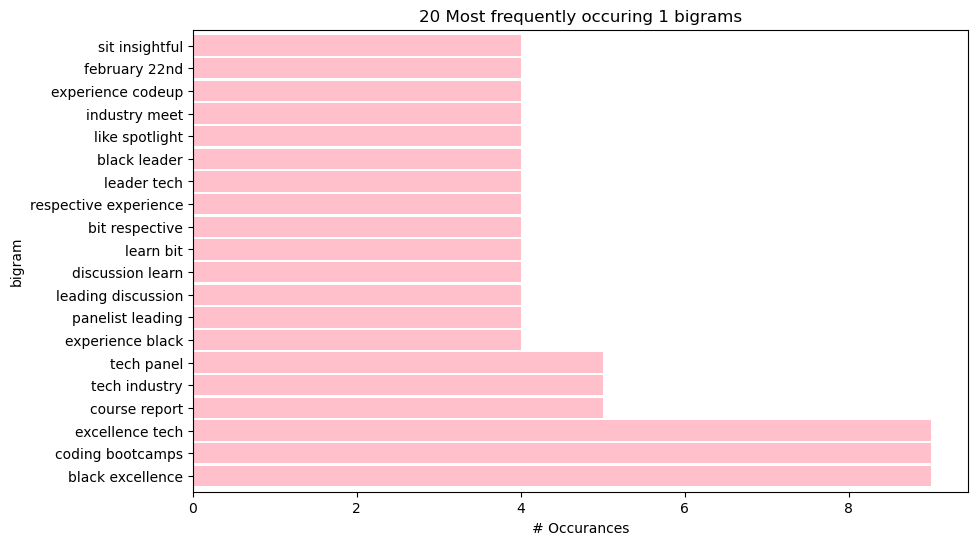

In [142]:
top_20_blogs_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring 1 bigrams')
plt.ylabel('bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_blogs_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

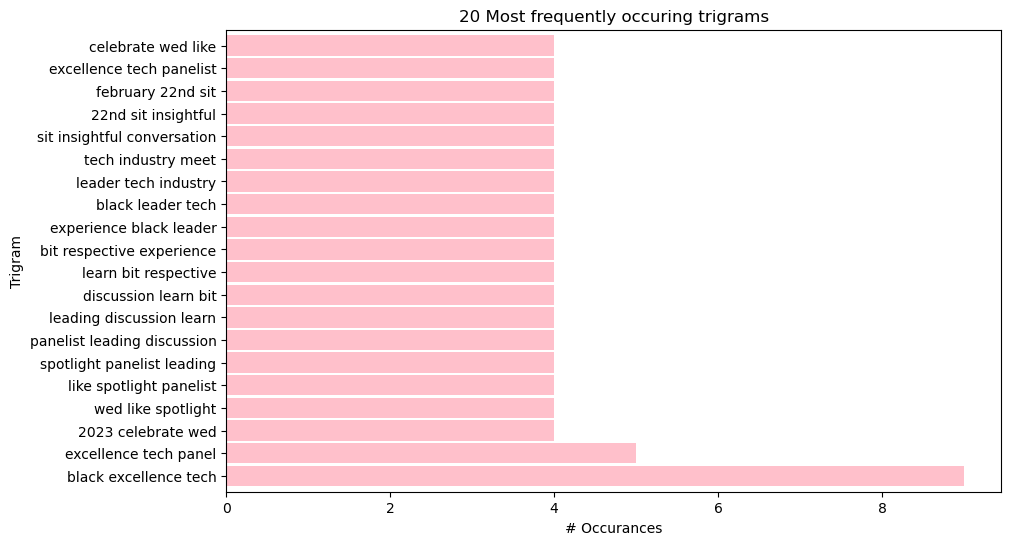

In [143]:
top_20_blogs_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_blogs_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2] )
_ = plt.yticks(ticks, labels)

In [45]:
# news_df.category.unique()

In [46]:
def get_words(string):
    string = clean_text(' '.join(news_df[news_df.category==string]['original']))
    return string

In [60]:
for topic in news_df.category.unique():
    print(topic)
    topic = get_words(topic)

business
sports
technology
entertainment


In [63]:
business = get_words('business')
sports = get_words('sports')
technology = get_words('technology')
entertainment = get_words('entertainment')


In [111]:
def get_ngram(topic, n=1):
    if n ==1: 
        unigrams = pd.Series(nltk.ngrams(topic, 1))
        return unigrams
    elif n==2 :
        bigrams = pd.Series(nltk.ngrams(topic, 2))
        return bigrams
    elif n ==3 :
        trigrams = pd.Series(nltk.ngrams(topic, 3))
        return trigrams
    else: 
        return None
        

In [112]:
business_unigrams = get_ngram(business)
business_bigrams = get_ngram(business,2)
business_trigrams = get_ngram(business,3)

In [113]:
business_unigrams

0              (10,)
1           (adani,)
2           (group,)
3           (stock,)
4          (closed,)
           ...      
975      (creditor,)
976         (china,)
977         (state,)
978    (department,)
979        (stated,)
Length: 980, dtype: object

In [114]:
business_bigrams

0                    (10, adani)
1                 (adani, group)
2                 (group, stock)
3                (stock, closed)
4               (closed, higher)
                 ...            
974    (participation, creditor)
975            (creditor, china)
976               (china, state)
977          (state, department)
978         (department, stated)
Length: 979, dtype: object

In [115]:
business_trigrams

0                       (10, adani, group)
1                    (adani, group, stock)
2                   (group, stock, closed)
3                  (stock, closed, higher)
4              (closed, higher, wednesday)
                      ...                 
973    (requires, participation, creditor)
974       (participation, creditor, china)
975               (creditor, china, state)
976             (china, state, department)
977            (state, department, stated)
Length: 978, dtype: object

In [150]:
top_20_business_unigrams = business_unigrams.value_counts().head(20)
top_20_business_bigrams = business_bigrams.value_counts().head(20)
top_20_business_trigrams = business_trigrams.value_counts().head(20)


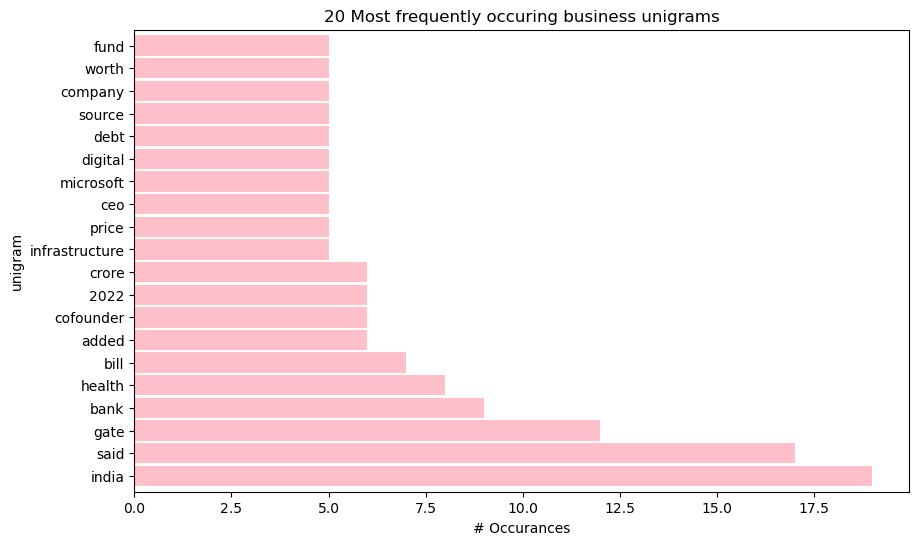

In [151]:
top_20_business_unigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring business unigrams')
plt.ylabel('unigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_business_unigrams.reset_index()['index'].apply(lambda t: t[0])
_ = plt.yticks(ticks, labels)

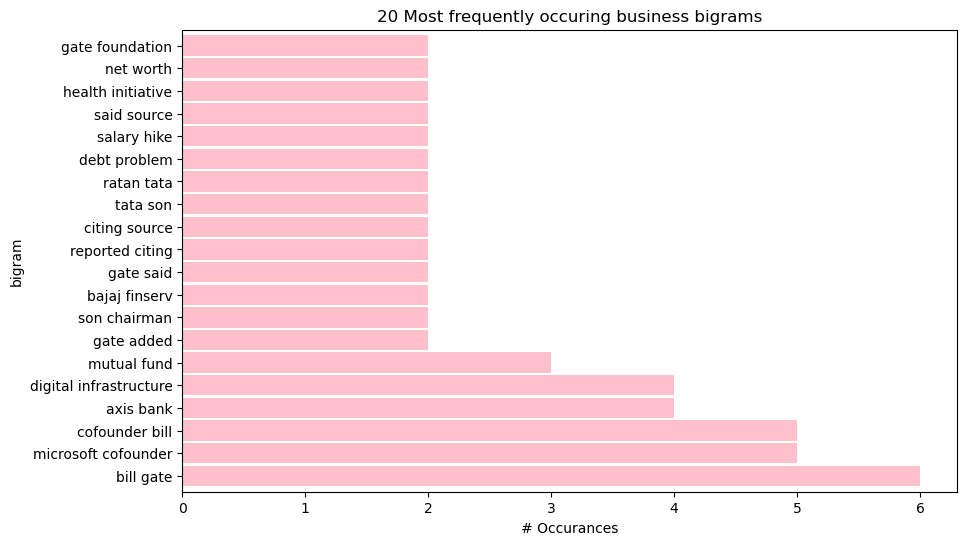

In [152]:
top_20_business_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring business bigrams')
plt.ylabel('bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_business_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

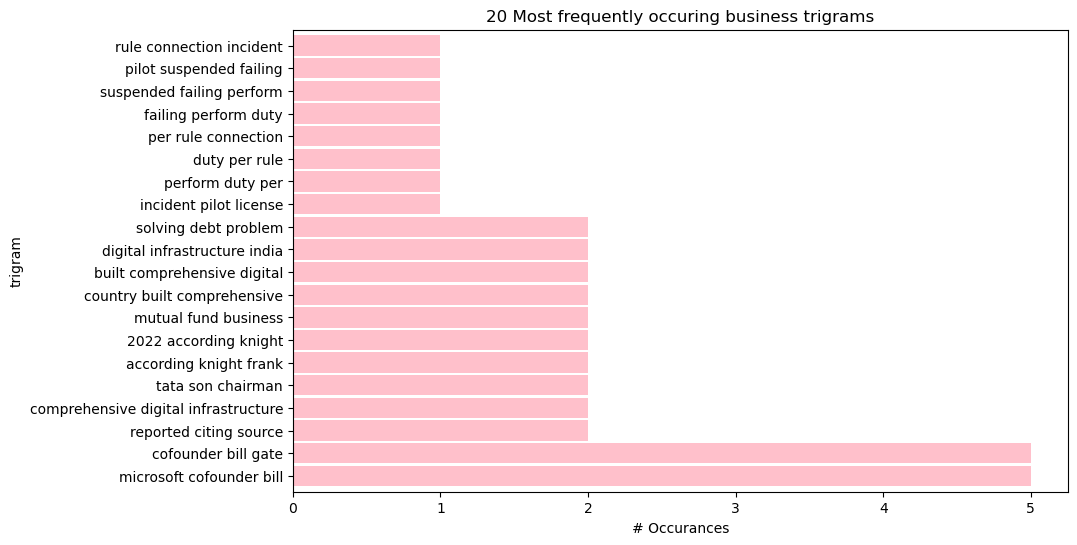

In [153]:
top_20_business_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring business trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_business_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

In [116]:
sports_unigrams = get_ngram(sports)
sports_bigrams = get_ngram(sports,2)
sports_trigrams = get_ngram(sports,3)

In [117]:
sports_unigrams

0              (team,)
1             (india,)
2        (allrounder,)
3      (ravichandran,)
4            (ashwin,)
            ...       
915      (adaptation,)
916             (one,)
917            (make,)
918       (condition,)
919          (stated,)
Length: 920, dtype: object

In [118]:
sports_bigrams

0                   (team, india)
1             (india, allrounder)
2      (allrounder, ravichandran)
3          (ravichandran, ashwin)
4                (ashwin, become)
                  ...            
914        (personal, adaptation)
915             (adaptation, one)
916                   (one, make)
917             (make, condition)
918           (condition, stated)
Length: 919, dtype: object

In [119]:
sports_trigrams

0               (team, india, allrounder)
1       (india, allrounder, ravichandran)
2      (allrounder, ravichandran, ashwin)
3          (ravichandran, ashwin, become)
4                 (ashwin, become, world)
                      ...                
913         (starc, personal, adaptation)
914           (personal, adaptation, one)
915               (adaptation, one, make)
916                (one, make, condition)
917             (make, condition, stated)
Length: 918, dtype: object

In [121]:
top_20_sports_unigrams = sports_unigrams.value_counts().head(20)
top_20_sports_unigrams.head()

(test,)         25
(india,)        19
(australia,)    16
(said,)         13
(added,)        13
dtype: int64

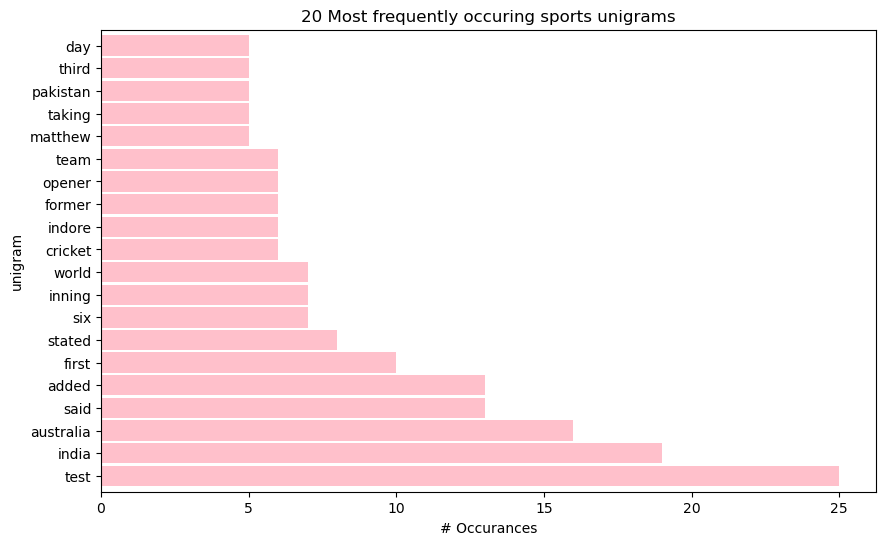

In [126]:
top_20_sports_unigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring sports unigrams')
plt.ylabel('unigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_sports_unigrams.reset_index()['index'].apply(lambda t: t[0])
_ = plt.yticks(ticks, labels)

In [120]:
top_20_sports_bigrams = sports_bigrams.value_counts().head(20)
top_20_sports_bigrams.head()

(first, inning)    7
(third, test)      5
(six, test)        5
(team, india)      4
(world, number)    4
dtype: int64

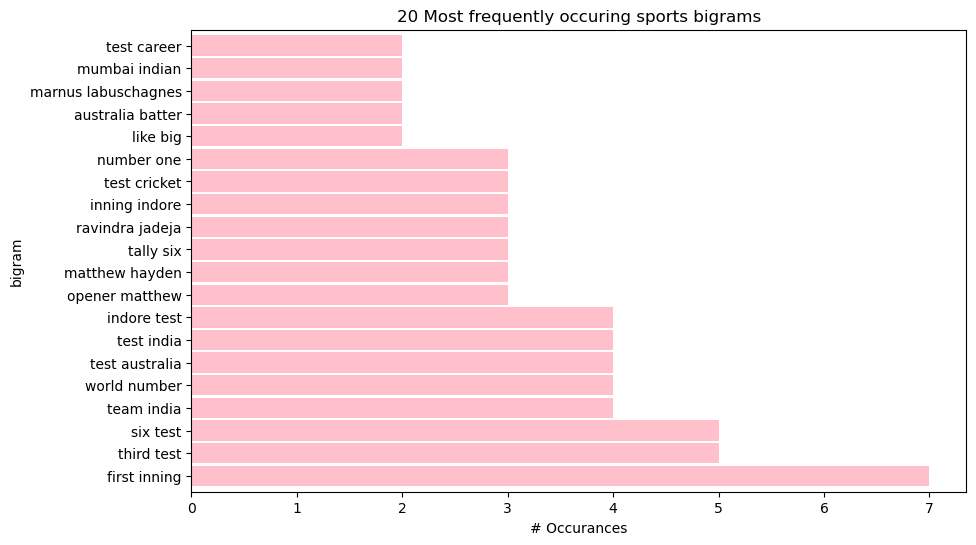

In [123]:
top_20_sports_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring sports bigrams')
plt.ylabel('bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_sports_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [122]:
top_20_sports_trigrams = sports_trigrams.value_counts().head(20)
top_20_sports_trigrams.head()

(six, test, cricket)         3
(world, number, one)         3
(inning, indore, test)       3
(indore, test, australia)    3
(tally, six, test)           3
dtype: int64

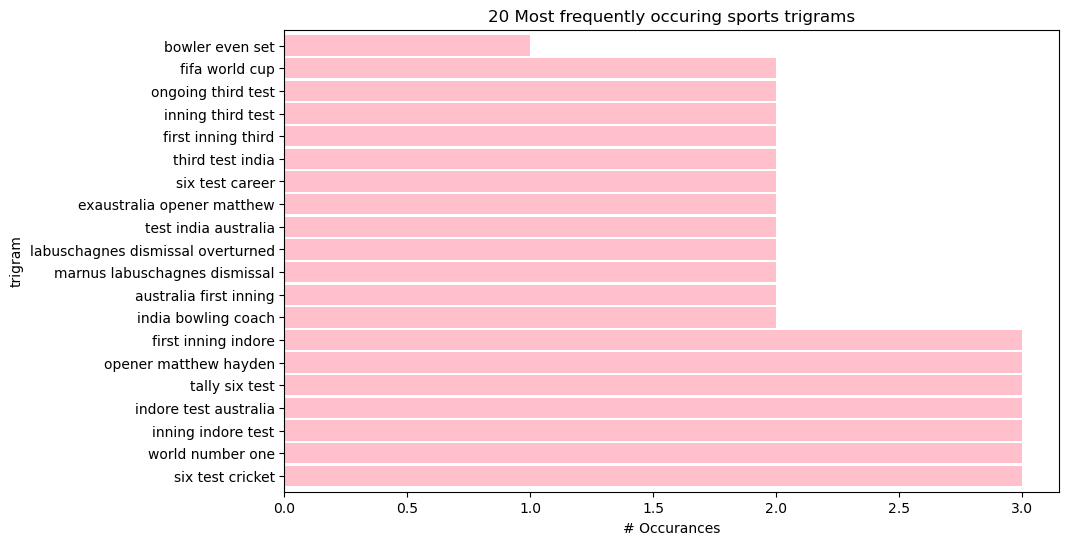

In [127]:
top_20_sports_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring sports trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_sports_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)